# Summary
Data focuses on independent films released in theaters between 2008 and 2017. Web-scraped data is imported and cleaned for possible use as features.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

# Data

## General Movie Data

In [3]:
# read in movie data web-scraped from boxofficemojo website
df_movies_raw = pd.read_csv('data/movies.csv')
df_movies_raw.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,budget,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,"$953,717","$953,717","October 6, 2017",Documentary,1 hrs. 29 min.,PG,NaN,42 theaters,196 days / 28 weeks,NaN,NaN
1,Churchill,Cohen Media Group,"$1,281,258","$1,281,258","June 2, 2017",Drama,1 hrs. 38 min.,PG,NaN,215 theaters,76 days / 10.9 weeks,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,"$2,402,067","$2,402,067","January 27, 2017",Drama / Thriller,2 hrs. 5 min.,PG-13,NaN,115 theaters,80 days / 11.4 weeks,NaN,NaN
3,Queen of Katwe,Buena Vista,"$8,874,389","$10,367,161","September 23, 2016",Sports Drama,2 hrs. 4 min.,PG,$15 million,"1,259 theaters",105 days / 15 weeks,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,"$232,641,920","$677,718,395","November 4, 2016",Action / Adventure,1 hrs. 55 min.,PG-13,$165 million,"3,882 theaters",133 days / 19 weeks,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


### Pre-liminary filtering/formatting

In [4]:
# create copy for manipulating
df_movies = df_movies_raw.copy()

In [5]:
# drop rows that are filled with column names
df_movies.drop(index=df_movies[df_movies['title'] == 'title'].index, inplace=True)

In [6]:
# drop unneeded columns
df_movies.drop('budget', axis=1, inplace=True)

In [7]:
# reformat titles with ':' characters
df_movies['title'] = df_movies['title'].apply(lambda x: x.replace(':,', ': '))

## Independent Movie Financial Data

In [8]:
# read in independent movie financial data web-scraped the-numbers website
df_indie_fin_raw = pd.read_csv('data/fin.csv')
df_indie_fin_raw.head()

,title,budget,dom_gross,intl_gross,disc_gross,release_date
0,Valerian and the City of a Thousand Planets (2...,"$180,000,000","$40,479,370","$215,116,144","$10,766,251","July 21st, 2017 (Wide) by"
1,Gods of Egypt (2016),"$140,000,000","$31,153,464","$133,553,464","$16,146,559","February 26th, 2016 (Wide) by"
2,The Divergent Series: Insurgent (2015),"$110,000,000","$130,179,072","$295,279,072","$35,099,488","March 20th, 2015 (Wide) by"
3,The Expendables 3 (2014),"$100,000,000","$39,322,544","$209,461,378","$27,073,145","August 15th, 2014 (Wide) by"
4,The Expendables (2010),"$82,000,000","$103,068,524","$268,268,174","$72,662,317","August 13th, 2010 (Wide) by"


### Pre-liminary filtering/formatting

In [9]:
# create copy for manipulating
df_indie_fin = df_indie_fin_raw.copy()

In [10]:
# drop unneeded columns
df_indie_fin.drop(['dom_gross', 'intl_gross', 'release_date'], axis=1, inplace=True)

# Challenges

## 1. Plot total domestic gross over time

In [11]:
# define function to remove '$' and ',' and convert to integer
def money_clean(dollar_num):
    try:
        clean_money = int(dollar_num.replace('$', '').replace(',', ''))
        return(clean_money)
    except:
        return(np.nan)

In [12]:
# apply function to dollar-formatted columns
df_movies['dom_gross'] = df_movies['dom_gross'].apply(money_clean)
df_movies['intl_gross'] = df_movies['intl_gross'].apply(money_clean)
df_movies.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717,"October 6, 2017",Documentary,1 hrs. 29 min.,PG,42 theaters,196 days / 28 weeks,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258,"June 2, 2017",Drama,1 hrs. 38 min.,PG,215 theaters,76 days / 10.9 weeks,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067,"January 27, 2017",Drama / Thriller,2 hrs. 5 min.,PG-13,115 theaters,80 days / 11.4 weeks,NaN,NaN
3,Queen of Katwe,Buena Vista,8874389.0,10367161,"September 23, 2016",Sports Drama,2 hrs. 4 min.,PG,"1,259 theaters",105 days / 15 weeks,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,232641920.0,677718395,"November 4, 2016",Action / Adventure,1 hrs. 55 min.,PG-13,"3,882 theaters",133 days / 19 weeks,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


In [13]:
# define function to convert release date to date format
def date_clean(date_str):
    try:
        return(datetime.strptime(date_str, '%B %d, %Y'))
    except:
        return(np.nan)

In [14]:
# apply function to date column
df_movies['release_date'] = df_movies['release_date'].apply(date_clean)
df_movies.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717,2017-10-06,Documentary,1 hrs. 29 min.,PG,42 theaters,196 days / 28 weeks,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258,2017-06-02,Drama,1 hrs. 38 min.,PG,215 theaters,76 days / 10.9 weeks,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067,2017-01-27,Drama / Thriller,2 hrs. 5 min.,PG-13,115 theaters,80 days / 11.4 weeks,NaN,NaN
3,Queen of Katwe,Buena Vista,8874389.0,10367161,2016-09-23,Sports Drama,2 hrs. 4 min.,PG,"1,259 theaters",105 days / 15 weeks,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,232641920.0,677718395,2016-11-04,Action / Adventure,1 hrs. 55 min.,PG-13,"3,882 theaters",133 days / 19 weeks,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


In [15]:
# remove movies prior to 2008 that inadvertently slipped into dataset
df_movies = df_movies[df_movies['release_date'].apply(lambda x: x.year) >= 2008]

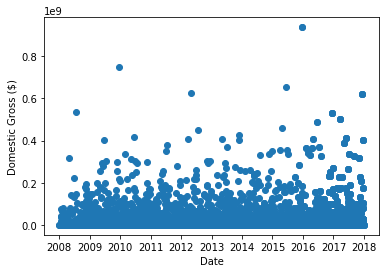

In [16]:
# plot domestic gross over time
plt.plot_date(df_movies['release_date'], df_movies['dom_gross'])
plt.xlabel('Date')
plt.ylabel('Domestic Gross ($)');

## 2. Plot runtime vs domestic total gross

In [17]:
# define function to convert runtime from hr:min string to total minute runtime
def run_clean(raw_run):
    try:
        clean_run = int(raw_run.split()[0]) * 60 + int(raw_run.split()[2])
        return(clean_run)
    except:
        return(np.nan)

In [18]:
# apply function to runtime column
df_movies['runtime'] = df_movies['runtime'].apply(run_clean)
df_movies.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717,2017-10-06,Documentary,89.0,PG,42 theaters,196 days / 28 weeks,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258,2017-06-02,Drama,98.0,PG,215 theaters,76 days / 10.9 weeks,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067,2017-01-27,Drama / Thriller,125.0,PG-13,115 theaters,80 days / 11.4 weeks,NaN,NaN
3,Queen of Katwe,Buena Vista,8874389.0,10367161,2016-09-23,Sports Drama,124.0,PG,"1,259 theaters",105 days / 15 weeks,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,232641920.0,677718395,2016-11-04,Action / Adventure,115.0,PG-13,"3,882 theaters",133 days / 19 weeks,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


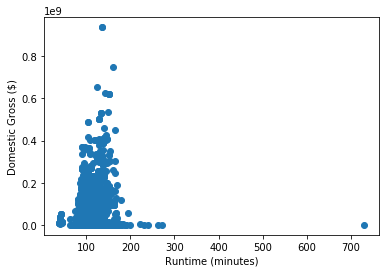

In [19]:
# plot
plt.scatter(df_movies['runtime'], df_movies['dom_gross'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Gross ($)');

## 3. Group by rating

In [20]:
df_movies[df_movies['mpaa_rating'] == 'mpaa_rating']

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors


In [21]:
df_movies.groupby('mpaa_rating')['dom_gross', 'runtime'].mean()

,dom_gross,runtime
mpaa_rating,,
G,4.588302e+07,77.150538
NC-17,1.658050e+06,119.200000
Not Yet Rated,3.351407e+05,111.833333
PG,6.798313e+07,100.537402
PG-13,6.103125e+07,110.440729
R,2.112817e+07,107.436580
Unknown,1.503425e+05,112.750000
Unrated,5.508855e+05,113.385389


## 4. Release date vs domestic gross by rating

In [22]:
# rating categories
cats = df_movies['mpaa_rating'].unique()

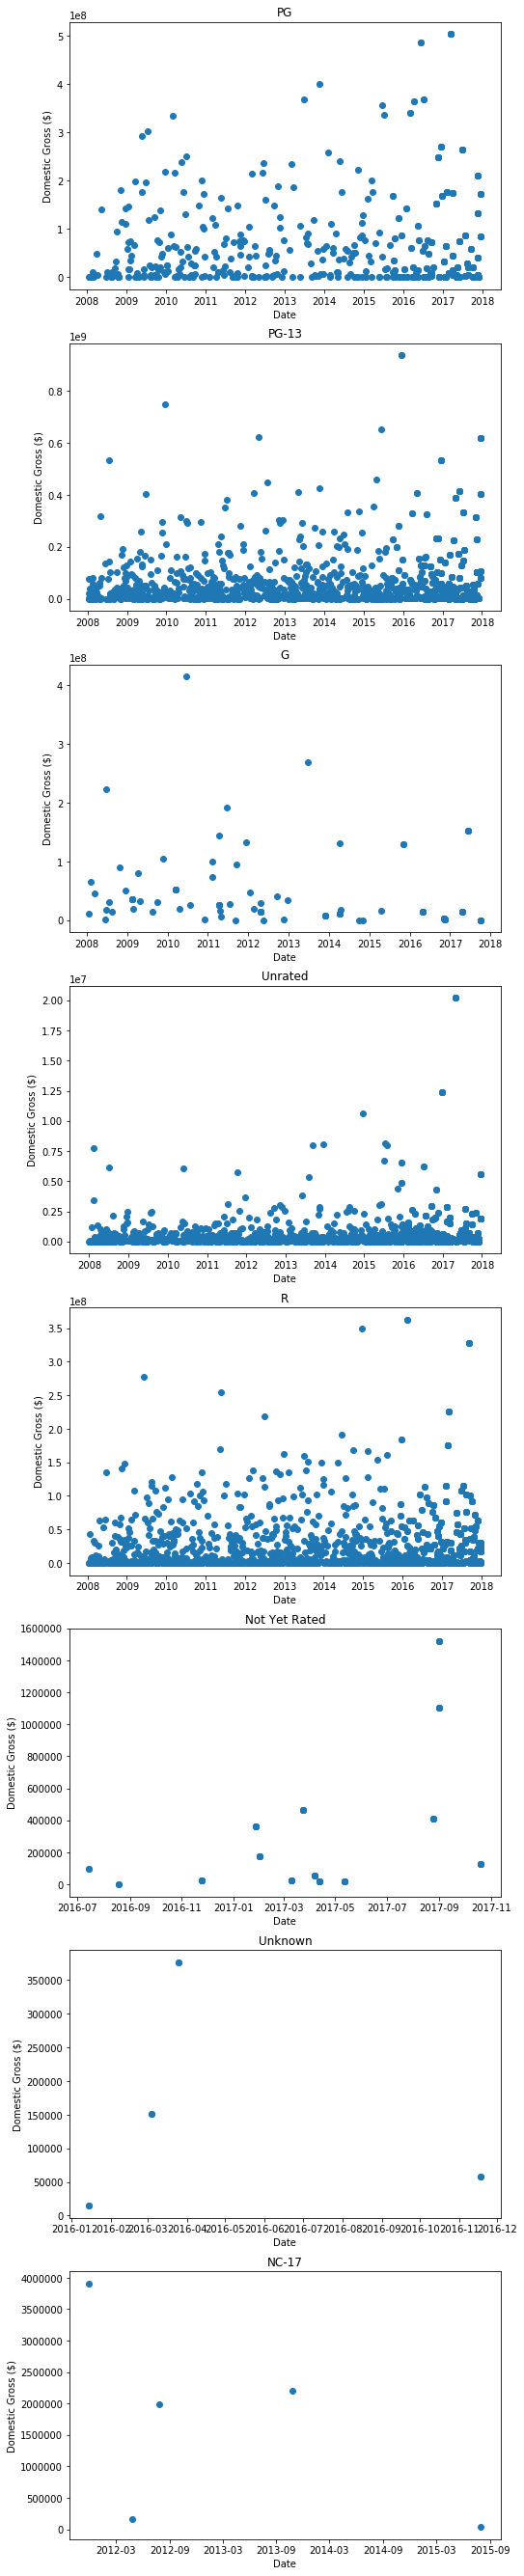

In [23]:
fig, axes = plt.subplots(nrows=len(cats), figsize=(8, 6*len(cats)))

for i, cat in enumerate(cats):
    release = df_movies[df_movies['mpaa_rating'] == cat]['release_date']
    gross = df_movies[df_movies['mpaa_rating'] == cat]['dom_gross']
    axes[i].plot_date(release, gross)
    axes[i].set_title(cat)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Domestic Gross ($)')

## 5. Director with highest gross per movie

In [24]:
df_direct = df_movies.copy()

In [25]:
# drop rows with nan values in domestic gross and director columns
df_direct.dropna(subset=['dom_gross', 'director'], inplace=True)
df_direct.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
3,Queen of Katwe,Buena Vista,8874389.0,10367161,2016-09-23,Sports Drama,124.0,PG,"1,259 theaters",105 days / 15 weeks,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,232641920.0,677718395,2016-11-04,Action / Adventure,115.0,PG-13,"3,882 theaters",133 days / 19 weeks,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."
7,Rogue One: A Star Wars Story,Buena Vista,532177324.0,1056057273,2016-12-16,Sci-Fi Adventure,133.0,PG-13,"4,157 theaters",140 days / 20 weeks,Gareth Edwards,"Felicity Jones,Mads Mikkelsen,Alan Tudyk,Donni..."
9,Pirates of the Caribbean: Dead Men Tell No Tales,Buena Vista,172558876.0,794861794,2017-05-26,Period Adventure,129.0,PG-13,"4,276 theaters",119 days / 17 weeks,"Joachim Ronning,Espen Sandberg","Johnny Depp,Javier Bardem,Brenton Thwaites,Geo..."
10,Coco,Buena Vista,209693761.0,794840924,2017-11-22,Animation,109.0,PG,"3,987 theaters",149 days / 21.3 weeks,Lee Unkrich,"Gael Garcia Bernal,Benjamin Bratt"


In [26]:
# total domestic gross per director
dir_gross = df_direct.groupby('director')['dom_gross'].sum()
# number of movies per director
dir_num_movies = df_direct.groupby('director')['dom_gross'].count()

In [27]:
# divide gross by number of movies, sort result in descending order and return index name of top value
dir_gross.divide(dir_num_movies).sort_values(ascending=False).index[0]

'James Cameron'

## 6. Mean domestic gross by month in 2017

In [28]:
# select movies from 2017
movies_2017 = df_movies[df_movies['release_date'].apply(lambda x: x.year) == 2017]
movies_2017.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717,2017-10-06,Documentary,89.0,PG,42 theaters,196 days / 28 weeks,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258,2017-06-02,Drama,98.0,PG,215 theaters,76 days / 10.9 weeks,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067,2017-01-27,Drama / Thriller,125.0,PG-13,115 theaters,80 days / 11.4 weeks,NaN,NaN
5,Born in China,Buena Vista,13873211.0,25081168,2017-04-21,Documentary,76.0,G,"1,508 theaters",77 days / 11 weeks,NaN,John Krasinski*
8,Cars 3,Buena Vista,152901115.0,383898278,2017-06-16,Animation,102.0,G,"4,256 theaters",140 days / 20 weeks,NaN,"Owen Wilson,Chris Cooper,Larry the Cable Guy,A..."


In [29]:
# group domestic gross average by month
mnth_2017 = movies_2017.groupby(movies_2017['release_date'].apply(lambda x: x.month))['dom_gross'].mean()
mnth_2017

release_date
1     1.519646e+07
2     3.232221e+07
3     4.227090e+07
4     1.895140e+07
5     4.020125e+07
6     4.785123e+07
7     4.573517e+07
8     1.913390e+07
9     2.418385e+07
10    1.273580e+07
11    6.695943e+07
12    6.464032e+07
Name: dom_gross, dtype: float64

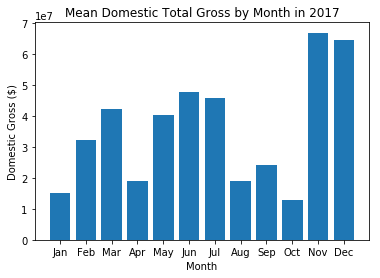

In [30]:
# plot gross average per month
plt.bar(range(len(mnth_2017)), mnth_2017)
plt.xticks(range(len(mnth_2017)), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Mean Domestic Total Gross by Month in 2017')
plt.xlabel('Month')
plt.ylabel('Domestic Gross ($)');

In [31]:
# 2017 average gross
movies_2017['dom_gross'].mean()

35209228.632258065

In [32]:
# calcluate standard error by month
SE = (mnth_2017 - movies_2017['dom_gross'].mean())**2
SE

release_date
1     4.005108e+14
2     8.334886e+12
3     4.986715e+13
4     2.643169e+14
5     2.492032e+13
6     1.598202e+14
7     1.107954e+14
8     2.584161e+14
9     1.215589e+14
10    5.050550e+14
11    1.008075e+15
12    8.661889e+14
Name: dom_gross, dtype: float64

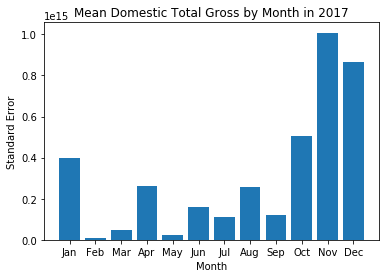

In [33]:
# plot standard error per month
plt.bar(range(len(SE)), SE)
plt.xticks(range(len(mnth_2017)), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Mean Domestic Total Gross by Month in 2017')
plt.xlabel('Month')
plt.ylabel('Standard Error');

# Independent Movie Data

In [34]:
df_movies.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717,2017-10-06,Documentary,89.0,PG,42 theaters,196 days / 28 weeks,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258,2017-06-02,Drama,98.0,PG,215 theaters,76 days / 10.9 weeks,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067,2017-01-27,Drama / Thriller,125.0,PG-13,115 theaters,80 days / 11.4 weeks,NaN,NaN
3,Queen of Katwe,Buena Vista,8874389.0,10367161,2016-09-23,Sports Drama,124.0,PG,"1,259 theaters",105 days / 15 weeks,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,232641920.0,677718395,2016-11-04,Action / Adventure,115.0,PG-13,"3,882 theaters",133 days / 19 weeks,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


## Clean number of theaters and time in theaters

In [35]:
# define function to return desired numerical value from string
def clean_count(dirty_count):
    try:
        cln = int(dirty_count.split(' ')[0])
        return(cln)
    except:
        return(np.nan)

In [36]:
# clean number of theaters to integer
df_movies['num_theaters'] = df_movies['num_theaters'].apply(clean_count)

In [37]:
# clean time in theaters to number of days integer
df_movies['num_days'] = df_movies['num_days'].apply(clean_count)

In [38]:
df_movies.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717,2017-10-06,Documentary,89.0,PG,42.0,196.0,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258,2017-06-02,Drama,98.0,PG,215.0,76.0,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067,2017-01-27,Drama / Thriller,125.0,PG-13,115.0,80.0,NaN,NaN
3,Queen of Katwe,Buena Vista,8874389.0,10367161,2016-09-23,Sports Drama,124.0,PG,NaN,105.0,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,232641920.0,677718395,2016-11-04,Action / Adventure,115.0,PG-13,NaN,133.0,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


## Adjust gross values to 2017 dollars

In [39]:
# average annual CPI numbers starting at 2008
cpi_values = {
    2008: 215.303, 
    2009: 214.537,
    2010: 218.056, 
    2011: 224.939, 
    2012: 229.594, 
    2013: 232.957, 
    2014: 236.736, 
    2015: 237.017, 
    2016: 240.007, 
    2017: 245.120
}

In [40]:
# create inflation factors for years 2008-2017
cpi_2017 = {}

for year in range(2008, 2018):
    cpi_2017[year] = cpi_values[2017] / cpi_values[year]

In [41]:
# define function to apply inflation factors to dataframe
def infl_calc(value, date):
    try:
        year = date.year
        infl_val = int(cpi_2017[int(year)] * value)
        return(float(infl_val))
    except:
        return(np.nan)

In [42]:
# apply inflation function to domestic gross
df_movies['dom_gross'] = df_movies.apply(
    lambda x: infl_calc(x['dom_gross'], x['release_date']), axis=1
)

In [43]:
# apply inflation function to international gross
df_movies['intl_gross'] = df_movies.apply(
    lambda x: infl_calc(x['intl_gross'], x['release_date']), axis=1
)

In [44]:
df_movies.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717.0,2017-10-06,Documentary,89.0,PG,42.0,196.0,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258.0,2017-06-02,Drama,98.0,PG,215.0,76.0,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067.0,2017-01-27,Drama / Thriller,125.0,PG-13,115.0,80.0,NaN,NaN
3,Queen of Katwe,Buena Vista,9063444.0,10588018.0,2016-09-23,Sports Drama,124.0,PG,NaN,105.0,Mira Nair,"Lupita Nyong'o,David Oyelowo"
4,Doctor Strange,Buena Vista,237598017.0,692156199.0,2016-11-04,Action / Adventure,115.0,PG-13,NaN,133.0,Scott Derrickson,"Benedict Cumberbatch,Tilda Swinton,Chiwetel Ej..."


## Filter to independent movies

In [45]:
# define Big 6 distributors to be removed
big_six = [
    'Buena Vista', 
    'Warner Bros.', 
    'Warner Bros. (New Line)', 
    'Sony / Columbia', 
    '20th Century Fox', 
    'Fox', 
    'Universal', 
    'Paramount', 
    'Paramount (DreamWorks)'
]

In [46]:
# create dataframe without Big 6 distributors
df_indie = df_movies.loc[~df_movies['distributor'].isin(big_six)].copy()
df_indie.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors
0,Faces Places,Cohen Media Group,953717.0,953717.0,2017-10-06,Documentary,89.0,PG,42.0,196.0,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258.0,2017-06-02,Drama,98.0,PG,215.0,76.0,NaN,"Brian Cox,John Slattery"
2,The Salesman,Cohen Media Group,2402067.0,2402067.0,2017-01-27,Drama / Thriller,125.0,PG-13,115.0,80.0,NaN,NaN
15,God's Own Country,Orion Pictures,335609.0,335609.0,2017-10-24,Drama,104.0,Unrated,13.0,136.0,NaN,NaN
69,T2: Trainspotting,TriStar,2402004.0,41681746.0,2017-03-17,Crime Comedy,117.0,R,331.0,70.0,Danny Boyle,"Ewen Bremner,Ewan McGregor"


## Add financial data from alternate dataframe

In [47]:
df_indie_fin.head()

,title,budget,disc_gross
0,Valerian and the City of a Thousand Planets (2...,"$180,000,000","$10,766,251"
1,Gods of Egypt (2016),"$140,000,000","$16,146,559"
2,The Divergent Series: Insurgent (2015),"$110,000,000","$35,099,488"
3,The Expendables 3 (2014),"$100,000,000","$27,073,145"
4,The Expendables (2010),"$82,000,000","$72,662,317"


In [48]:
# define function to remove release year from titles
def title_clean(title):
    rev_title = title[:-7]
    return(rev_title)

In [49]:
# apply title reformatting to dataframe so dataframes can be merged
df_indie_fin['title'] = df_indie_fin['title'].apply(title_clean)
df_indie_fin.head()

,title,budget,disc_gross
0,Valerian and the City of a Thousand Planets,"$180,000,000","$10,766,251"
1,Gods of Egypt,"$140,000,000","$16,146,559"
2,The Divergent Series: Insurgent,"$110,000,000","$35,099,488"
3,The Expendables 3,"$100,000,000","$27,073,145"
4,The Expendables,"$82,000,000","$72,662,317"


In [50]:
# merge dataframes based on title
df_indie = pd.merge(df_indie, df_indie_fin, on='title', how='left')
df_indie.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors,budget,disc_gross
0,Faces Places,Cohen Media Group,953717.0,953717.0,2017-10-06,Documentary,89.0,PG,42.0,196.0,NaN,NaN,NaN,NaN
1,Churchill,Cohen Media Group,1281258.0,1281258.0,2017-06-02,Drama,98.0,PG,215.0,76.0,NaN,"Brian Cox,John Slattery",NaN,NaN
2,The Salesman,Cohen Media Group,2402067.0,2402067.0,2017-01-27,Drama / Thriller,125.0,PG-13,115.0,80.0,NaN,NaN,NaN,NaN
3,God's Own Country,Orion Pictures,335609.0,335609.0,2017-10-24,Drama,104.0,Unrated,13.0,136.0,NaN,NaN,NaN,NaN
4,T2: Trainspotting,TriStar,2402004.0,41681746.0,2017-03-17,Crime Comedy,117.0,R,331.0,70.0,Danny Boyle,"Ewen Bremner,Ewan McGregor","$18,000,000","$1,263,168"


## Clean budget values

In [51]:
# reformat budget and disc gross values using previously defined function
df_indie['budget'] = df_indie['budget'].apply(money_clean)
df_indie['disc_gross'] = df_indie['disc_gross'].apply(money_clean)

## Create separate year and month columns

In [52]:
# create release year column
df_indie['release_year'] = df_indie['release_date'].apply(lambda x: datetime.date(x).strftime('%Y'))

In [53]:
# create release month column
df_indie['release_month'] = df_indie['release_date'].apply(lambda x: datetime.date(x).strftime('%B'))

In [54]:
df_indie.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors,budget,disc_gross,release_year,release_month
0,Faces Places,Cohen Media Group,953717.0,953717.0,2017-10-06,Documentary,89.0,PG,42.0,196.0,NaN,NaN,NaN,NaN,2017,October
1,Churchill,Cohen Media Group,1281258.0,1281258.0,2017-06-02,Drama,98.0,PG,215.0,76.0,NaN,"Brian Cox,John Slattery",NaN,NaN,2017,June
2,The Salesman,Cohen Media Group,2402067.0,2402067.0,2017-01-27,Drama / Thriller,125.0,PG-13,115.0,80.0,NaN,NaN,NaN,NaN,2017,January
3,God's Own Country,Orion Pictures,335609.0,335609.0,2017-10-24,Drama,104.0,Unrated,13.0,136.0,NaN,NaN,NaN,NaN,2017,October
4,T2: Trainspotting,TriStar,2402004.0,41681746.0,2017-03-17,Crime Comedy,117.0,R,331.0,70.0,Danny Boyle,"Ewen Bremner,Ewan McGregor",18000000.0,1263168.0,2017,March


## Handle NaN values

In [55]:
# nan values per column
df_indie.isna().sum()

title               0
distributor         0
dom_gross           3
intl_gross          0
release_date        0
genre               0
runtime            67
mpaa_rating         0
num_theaters      781
num_days          258
director         2905
actors           2235
budget           3459
disc_gross       3459
release_year        0
release_month       0
dtype: int64

In [56]:
# replace missing values with mean values
df_indie.fillna(df_indie.mean().astype(int), inplace=True)
df_indie.head()

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors,budget,disc_gross,release_year,release_month
0,Faces Places,Cohen Media Group,953717.0,953717.0,2017-10-06,Documentary,89.0,PG,42.0,196.0,NaN,NaN,27546069.0,12312196.0,2017,October
1,Churchill,Cohen Media Group,1281258.0,1281258.0,2017-06-02,Drama,98.0,PG,215.0,76.0,NaN,"Brian Cox,John Slattery",27546069.0,12312196.0,2017,June
2,The Salesman,Cohen Media Group,2402067.0,2402067.0,2017-01-27,Drama / Thriller,125.0,PG-13,115.0,80.0,NaN,NaN,27546069.0,12312196.0,2017,January
3,God's Own Country,Orion Pictures,335609.0,335609.0,2017-10-24,Drama,104.0,Unrated,13.0,136.0,NaN,NaN,27546069.0,12312196.0,2017,October
4,T2: Trainspotting,TriStar,2402004.0,41681746.0,2017-03-17,Crime Comedy,117.0,R,331.0,70.0,Danny Boyle,"Ewen Bremner,Ewan McGregor",18000000.0,1263168.0,2017,March


## Check for odd values

In [58]:
df_indie.describe()

,dom_gross,intl_gross,runtime,num_theaters,num_days,budget,disc_gross
count,4.006000e+03,4.006000e+03,4006.000000,4006.000000,4006.000000,4.006000e+03,4.006000e+03
mean,8.643002e+06,2.450534e+07,108.182476,114.186221,76.248627,2.754607e+07,1.231220e+07
std,2.473795e+07,6.812623e+07,21.485829,172.318180,63.375449,1.052716e+07,8.503681e+06
min,7.500000e+01,7.500000e+01,40.000000,1.000000,-98.000000,9.000000e+05,1.779700e+04
25%,7.881175e+04,1.714190e+05,95.000000,12.000000,31.000000,2.754607e+07,1.231220e+07
50%,5.471075e+05,1.865596e+06,105.000000,57.000000,70.000000,2.754607e+07,1.231220e+07
75%,4.510132e+06,1.815290e+07,118.000000,114.000000,105.000000,2.754607e+07,1.231220e+07
max,4.468405e+08,9.101752e+08,729.000000,995.000000,947.000000,1.800000e+08,2.649457e+08


In [59]:
# find negative instances of number of days feature
df_indie['num_days'][df_indie['num_days'] < 0]

3404   -98.0
Name: num_days, dtype: float64

In [60]:
neg_idx = df_indie['num_days'][df_indie['num_days'] < 0].index.values

In [61]:
df_indie.loc[neg_idx, :]

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors,budget,disc_gross,release_year,release_month
3404,The Tracey Fragments,ThinkFilm,37165.0,48178.0,2008-05-09,Drama,80.0,R,4.0,-98.0,NaN,Ellen Page,27546069.0,12312196.0,2008,May


In [62]:
# take absolute value of negative value
df_indie.loc[neg_idx, 'num_days'] = \
abs(df_indie.loc[neg_idx, 'num_days'])

In [63]:
# corrected observation
df_indie.loc[neg_idx, :]

,title,distributor,dom_gross,intl_gross,release_date,genre,runtime,mpaa_rating,num_theaters,num_days,director,actors,budget,disc_gross,release_year,release_month
3404,The Tracey Fragments,ThinkFilm,37165.0,48178.0,2008-05-09,Drama,80.0,R,4.0,98.0,NaN,Ellen Page,27546069.0,12312196.0,2008,May


## Export to CSV

In [64]:
df_indie.columns

Index(['title', 'distributor', 'dom_gross', 'intl_gross', 'release_date',
       'genre', 'runtime', 'mpaa_rating', 'num_theaters', 'num_days',
       'director', 'actors', 'budget', 'disc_gross', 'release_year',
       'release_month'],
      dtype='object')

In [65]:
# columns in order (excluding unneeded columns)
col_ord = [
    'title', 
    'distributor', 
    'genre', 
    'mpaa_rating', 
    'release_month', 
    'budget',  
    'runtime', 
    'num_theaters', 
    'num_days', 
    'release_year', 
    'dom_gross', 
    'intl_gross',
    'disc_gross'
]

In [66]:
# rearrange dataframe column order
df_indie = df_indie[col_ord]
df_indie.head()

,title,distributor,genre,mpaa_rating,release_month,budget,runtime,num_theaters,num_days,release_year,dom_gross,intl_gross,disc_gross
0,Faces Places,Cohen Media Group,Documentary,PG,October,27546069.0,89.0,42.0,196.0,2017,953717.0,953717.0,12312196.0
1,Churchill,Cohen Media Group,Drama,PG,June,27546069.0,98.0,215.0,76.0,2017,1281258.0,1281258.0,12312196.0
2,The Salesman,Cohen Media Group,Drama / Thriller,PG-13,January,27546069.0,125.0,115.0,80.0,2017,2402067.0,2402067.0,12312196.0
3,God's Own Country,Orion Pictures,Drama,Unrated,October,27546069.0,104.0,13.0,136.0,2017,335609.0,335609.0,12312196.0
4,T2: Trainspotting,TriStar,Crime Comedy,R,March,18000000.0,117.0,331.0,70.0,2017,2402004.0,41681746.0,1263168.0


In [67]:
# export dataframe to csv file
df_indie.to_csv('data/movie_data.csv', index=False)